<!DOCTYPE html>
<html lang="id" translate="no">
 <head>
  <title data-rh="true">
   Situs Jual Beli Online Terlengkap, Mudah &amp; Aman | Tokopedia
  </title>
  <meta charset="utf-8"/>
  <meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
  <link crossorigin="" href="https://assets.tokopedia.net" rel="preconnect"/>
  <link href="https://assets.tokopedia.net" nonce="Aii+qSGykethiq2lUdA9Bw==" rel="dns-prefetch"/>
  <link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/>
  <link href="https://gql.tokopedia.com" nonce="Aii+qSGykethiq2lUdA9Bw==" rel="dns-prefetch"/>
  <link crossorigin="" href="https://googleads.g.doubleclick.net" rel="preconnect"/>
  <link href="https://googleads.g.doubleclick.net" nonce="Aii+qSGykethiq2lUdA9Bw==" rel="dns-prefetch"/>
  <link crossorigin="" href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://www.google-analytics.com" nonce="Aii+qSGykethiq2lU
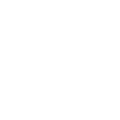
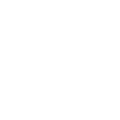
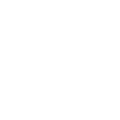

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.tokopedia.com/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    print(soup.prettify())  # This prints the raw HTML of the page
else:
    print("Failed to retrieve page:", response.status_code)


In [6]:
import selenium
from selenium.webdriver.common.by import By                             # By to get element using selector              
from selenium import webdriver as wb                                    # wb to run the driver
from selenium.webdriver.support import expected_conditions as EC        # EC to handle exception conditions
from selenium.webdriver.support.ui import WebDriverWait as wait         # wait to handle wait conditions
import pandas as pd                                                     # pd to export data
from tqdm import tqdm                                                   # tqdm to visualize looping process
from selenium.webdriver.common.keys import Keys                         # Keys as procedures using the keyboards
import datetime


# initialize driver Chrome to run simulation and get URL
driver = wb.Chrome()
driver.get('https://www.tokopedia.com/')

driver.implicitly_wait(5)

# initialize input to get keywords and pages
keywords = input("Keywords: ")
pages = int(input("Pages: "))

# initialize search to search by keywords and press ENTER
search = driver.find_element(By.XPATH, '//*[@id="header-main-wrapper"]/div[2]/div[2]/div/div/div/div/input')
search.send_keys(keywords)
search.send_keys(Keys.ENTER)

driver.implicitly_wait(5)

# initialize product_data to store product data as an array
product_data = []

# define scrolling to scroll page
def scrolling():
    scheight = .1
    while scheight < 9.9:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight/%s);" % scheight)
        scheight += .01

# define reverse_scrolling to reverse the scroll
def reverse_scrolling():
    body = driver.find_element(By.TAG_NAME, 'body')

    i = 0
    while True:
        body.send_keys(Keys.PAGE_DOWN)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        i += 1
        if i >= 25:
            break

# define extract_data to extract data using driver
def extract_data(driver):

    driver.implicitly_wait(20)
    driver.refresh()
    scrolling()

    # get the data item using XPATH selector, wait up for 30 secs if it exceeds it will issue an exception
    data_item = wait(driver, 30).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "css-12sieg3")]')))

    # if the data items do not add up to 80 it will repeat the data retrieval process
    if len(data_item) != 80:
        driver.refresh()
        driver.implicitly_wait(10)
        scrolling()

        data_item = wait(driver, 30).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "css-12sieg3")]')))

    # loop to extract attribute data using XPATH selector
    for item in tqdm(data_item):

        element = wait(item, 10).until(EC.presence_of_element_located((By.XPATH, './/div[@class="css-y5gcsw"]')))

        name = element.find_element(By.XPATH, './/div[@class="prd_link-product-name css-3um8ox"]').text
        price = element.find_element(By.XPATH, './/div[@class="prd_link-product-price css-1ksb19c"]').text
        location = element.find_element(By.XPATH, './/span[@class="prd_link-shop-loc css-1kdc32b flip"]').text
        try:
            rating = element.find_element(By.XPATH, './/span[@class="prd_rating-average-text css-t70v7i"]').text
        except:
            rating = None

        try:
            sold = element.find_element(By.XPATH, './/span[@class="prd_label-integrity css-1duhs3e"]').text
        except:
            sold = None    

        details_link = element.find_element(By.XPATH, './/div[@class="css-1f2quy8"]/a').get_property('href')

        # store data to the dictionary
        data = {
            'name': name,
            'price': price,
            'location': location,
            'rating': rating,
            'sold': sold,
            'details_link': details_link
        }

        # append data to product_data
        product_data.append(data)

stop = 1

# loop to scraping process 
while stop <= pages:
    extract_data(driver)

    # get the next button element using CSS selector, wait up for 60 secs if it exceeds it will issue an exception
    try:
        next_page = wait(driver, 60).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '[aria-label="Laman berikutnya"]')))
    except:
        driver.refresh()
        scrolling()
        reverse_scrolling()
        scrolling()
        next_page = wait(driver, 60).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '[aria-label="Laman berikutnya"]')))
    
    # click the next_page button
    try:
        next_page.click()
    except:
        break

    stop += 1

    
df = pd.DataFrame(product_data)

now = datetime.datetime.today().strftime('%d-%m-%Y')

# export data to csv and json
df.to_csv(f'sample_data_{now}.csv', index=False)
df.to_json(f'sample_data_{now}.json', orient='records')




TimeoutException: Message: 


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd

class Scraper:
    def __init__(self):
        options = webdriver.ChromeOptions() 
        options.add_argument("start-maximized")
        # to supress the error messages/logs
        options.add_experimental_option('excludeSwitches', ['enable-logging'])

        self.driver = webdriver.Chrome(options=options, executable_path=r'Your/Path/ToChrome/Driver.exe')
    
    def get_data(self):
        self.driver.get('url')

        data = []
        
        # Scrap datas from 10 pages
        for page in range(10):

            WebDriverWait(self.driver, 3).until(EC.presence_of_element_located((By.CSS_SELECTOR, '#zeus-root')))
            time.sleep(2)

            # Scroll the page until the end of the page
            if page == 10:
                scroll = 11
            else:
                scroll = 12
                
            for i in range(scroll):
                self.driver.execute_script('window.scrollBy(0,500)')
                time.sleep(1)
        
            # Parse the page
            soup = BeautifulSoup(self.driver.page_source, 'html.parser')

            # Scrap website pages
            for item in soup.find_all('div', class_='css-974ipl'):
                # Scrap product names and titles
                product_name = item.find('div', class_='prd_link-product-name css-3um8ox').text
                price = item.find('div', class_='prd_link-product-price css-1ksb19c').text

                # Check if there is any rating or not
                rates = item.find_all('span', class_='prd_rating-average-text css-t70v7i')
                if len(rates) > 0:
                    rate = item.find('span', class_='prd_rating-average-text css-t70v7i').text
                else:
                    rate = ''

                # Check if there is any sold item or not
                sold_items = item.find_all('span', class_='prd_label-integrity css-1duhs3e')
                if len(sold_items) > 0:
                    sold = item.find('span', class_='prd_label-integrity css-1duhs3e').text
                else:
                    sold = 0

                # Scrap address details
                for item2 in item.find_all('div', class_='css-1rn0irl'):
                    try :
                        location = item2.find('span', class_='prd_link-shop-loc css-1kdc32b flip').text
                    except AttributeError:
                        location = ''
                    try: 
                        seller = item.find('span', class_='prd_link-shop-name css-1kdc32b flip').text
                    except AttributeError:
                        seller = ''

                    data.append(
                        {
                            'Penjual' : seller,
                            'Lokasi': location,
                            'Produk': product_name,
                            'Harga': price,
                            'Rate': rate,
                            'Tejual': sold
                        }
                    )

            time.sleep(1)
            self.driver.find_element(By.CSS_SELECTOR, 'button[aria-label^="Laman berikutnya"]').click()
            time.sleep(2)

        self.driver.close()
        
        return data

scraper = Scraper()
data = scraper.get_data()

df = pd.DataFrame(data)
df.to_csv('dataset.csv') 

TypeError: __init__() got an unexpected keyword argument 'executable_path'

In [8]:
search

<selenium.webdriver.remote.webelement.WebElement (session="42cdb0ca7a97c2716cce561ff93e75d7", element="f.A4E426415D5E5C423A152FD4CB29115D.d.E903CD48E7FD99C02E0A562E5430864A.e.21")>

In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

search_query="nike+shoes+men"
base_url="https://www.amazon.com/s?k="
url=base_url+search_query
print(url)

https://www.amazon.com/s?k=nike+shoes+men


In [13]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36','referer':'https://www.amazon.com/s?k=nike+shoes+men&crid=28WRS5SFLWWZ6&sprefix=nike%2Caps%2C357&ref=nb_sb_ss_organic-diversity_2_4'}
search_response=requests.get(url,headers=header)
search_response.status_code

200

In [14]:
search_response.text

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

In [15]:
cookie={}
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

def Searchasin(asin):
    url="https://www.amazon.com/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

def Searchreviews(review_link):
    url="https://www.amazon.com"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

product_names=[]
response=getAmazonSearch('nike+shoes+men')
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list

product_names

https://www.amazon.com/s?k=nike+shoes+men


[]

In [31]:
products = []
for product_data in soup.findAll("div",{'class':'a-section a-spacing-small puis-padding-left-small puis-padding-right-small'}):
	item_tag = product_data.select_one('a[href*="/dp/"] h2')
	item_name = item_tag.get_text(strip=True) if item_tag else None

	price_tag = product_data.select_one('.a-price .a-offscreen')
	price = price_tag.get_text(strip=True) if price_tag else None

	brand_tag = product_data.select_one('div[data-cy="title-recipe"] h2 span')
	store = brand_tag.get_text(strip=True) if brand_tag else None

	rating_tag = product_data.select_one('a.a-popover-trigger[aria-label]')
	rating = rating_tag['aria-label'] if rating_tag else None
	match = re.search(r'\d+\.\d+', rating)
	rating_number = match.group() if match else None


	reviews_tag = product_data.select_one('a[href*="#customerReviews"] span')
	number_of_reviews = reviews_tag.get_text(strip=True) if reviews_tag else None

	products.append({
		"item-name": item_name,
		"price" : price,
		"brand": store,
		"rating": rating_number,
		"number of reviews": number_of_reviews
	})

	print("Item Name:", item_name)
	print("Price:", price)
	print("Store/Brand:", store)
	print("Rating:", rating)
	print("Number of Reviews:", number_of_reviews)
	print()

print(len(products))

Item Name: Men's Air Force 1'07 Shoes Basketball
Price: $97.99
Store/Brand: Nike
Rating: 4.6 out of 5 stars, rating details
Number of Reviews: 10,367

Item Name: Men's Court Vision Low Sneaker
Price: $74.99
Store/Brand: Nike
Rating: 4.0 out of 5 stars, rating details
Number of Reviews: 86

Item Name: Air Force 1 '07 LV8 Men's Shoes (HV5752-410, Midnight Navy/Light Crimson/University Gold/Blue Void)
Price: $132.95
Store/Brand: Nike
Rating: 4.8 out of 5 stars, rating details
Number of Reviews: 11

Item Name: Men's Modern
Price: $99.00
Store/Brand: Nike
Rating: 4.4 out of 5 stars, rating details
Number of Reviews: 258

Item Name: Men's Formation Gymnastics Shoe
Price: $69.99
Store/Brand: Nike
Rating: 4.4 out of 5 stars, rating details
Number of Reviews: 29,687

Item Name: Men's Infinity G Next Nature Sneaker
Price: $75.00
Store/Brand: Nike
Rating: 5.0 out of 5 stars, rating details
Number of Reviews: 1

Item Name: Men's Air Jordan 1 Low Shoes
Price: $120.00
Store/Brand: Men's Air Jordan 1

In [35]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

search_query="nike+shoes+men"
base_url="https://www.amazon.com/s?k="
url=base_url+search_query

header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36','referer':'https://www.amazon.com/s?k=nike+shoes+men&crid=28WRS5SFLWWZ6&sprefix=nike%2Caps%2C357&ref=nb_sb_ss_organic-diversity_2_4'}
response=requests.get(url,headers=header)

soup=BeautifulSoup(response.content)
products = []
for product_data in soup.findAll("div",{'class':'a-section a-spacing-small puis-padding-left-small puis-padding-right-small'}):
	item_tag = product_data.select_one('a[href*="/dp/"] h2')
	item_name = item_tag.get_text(strip=True) if item_tag else None

	price_tag = product_data.select_one('.a-price .a-offscreen')
	price = price_tag.get_text(strip=True) if price_tag else None

	brand_tag = product_data.select_one('div[data-cy="title-recipe"] h2 span')
	store = brand_tag.get_text(strip=True) if brand_tag else None

	try:
		rating_tag = product_data.select_one('a.a-popover-trigger[aria-label]')
		rating = rating_tag['aria-label'] if rating_tag else None
		match = re.search(r'\d+\.\d+', rating)
		rating_number = match.group() if match else None
	except:
		rating_number = None


	reviews_tag = product_data.select_one('a[href*="#customerReviews"] span')
	if reviews_tag:
		review_text = reviews_tag.get_text(strip=True).replace(",", "")
		try:
			number_of_reviews = int(review_text)
		except ValueError:
			number_of_reviews = None
	else:
		number_of_reviews = None

	products.append({
		"item-name": item_name,
		"price" : price,
		"brand": store,
		"rating": rating_number,
		"number of reviews": number_of_reviews
	})

df = pd.DataFrame(products)
df.to_csv('nike_shoes.csv', index=False)